In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import zipfile
import os

# Path to the dataset
dataset_zip_path = '/content/drive/MyDrive/mall dataset/mall_dataset.zip'
unzip_dir = '/content/mall_dataset'

# Unzip the dataset
if not os.path.exists(unzip_dir):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Dataset unzipped to {unzip_dir}")
else:
    print(f"Dataset already unzipped at {unzip_dir}")

Dataset unzipped to /content/mall_dataset


## Creating images.npy


In [ ]:
import numpy as np
from PIL import Image
import glob

# Path to the folder containing frames
frames_path = '/content/mall_dataset/mall_dataset/frames/'

# Load images
images = []
image_paths = sorted(glob.glob(frames_path + '*.jpg'))  # Sort to ensure the correct order
for img_path in image_paths:
    img = Image.open(img_path)  # Open image
    img = np.array(img)  # Convert to NumPy array
    images.append(img)

# Convert the list to a NumPy array and save
images = np.array(images)
np.save('/content/images.npy', images)
print(f"`images.npy` has been successfully created with shape: {images.shape}")

`images.npy` has been successfully created with shape: (2000, 480, 640, 3)


In [ ]:
# Load the saved images.npy file
loaded_images = np.load('/content/images.npy')
print(f"Loaded images.npy with shape: {loaded_images.shape}")

Loaded images.npy with shape: (2000, 480, 640, 3)


## Creating images_gt.npy from ground_truth.mat file.


In [ ]:
import numpy as np
from scipy.io import loadmat

# Load the .mat file
ground_truth_path = '/content/mall_dataset/mall_dataset/ground_truth.mat'
ground_truth_data = loadmat(ground_truth_path)

# Extract ground truth points for all frames
frame_annotations = ground_truth_data['frame']  # Assuming 'frame' contains the data

# Initialize a list to store ground truth points
images_gt = []

for frame_data in frame_annotations[0]:
    if 'loc' in frame_data.dtype.names:
        frame_gt = frame_data['loc'][0, 0]  # Access the 'loc' field for each frame
        images_gt.append(frame_gt)

# Convert to a NumPy array
images_gt = np.array(images_gt, dtype=object)  # Keep as an object array since frames may have different counts

# Save the ground truth data
images_gt_save_path = '/content/images_gt.npy'
np.save(images_gt_save_path, images_gt)
print(f"`images_gt.npy` has been successfully created at {images_gt_save_path}!")

# Load and verify the saved file
loaded_images_gt = np.load(images_gt_save_path, allow_pickle=True)
print(f"Loaded images_gt shape: {loaded_images_gt.shape}")

# Optional: Display the ground truth for a specific frame (e.g., frame 200)
frame_id = 200
print(f"Ground truth for frame {frame_id}: {loaded_images_gt[frame_id]}")

`images_gt.npy` has been successfully created at /content/images_gt.npy!
Loaded images_gt shape: (2000,)
Ground truth for frame 200: [[141.38794926  45.65856237]
 [133.26955603  68.99894292]
 [184.00951374  42.6141649 ]
 [191.11310782  44.64376321]
 [213.43868922  43.62896406]
 [230.69027484  43.62896406]
 [175.89112051  81.17653277]
 [149.50634249 111.6205074 ]
 [180.96511628 114.66490486]
 [211.40909091 104.51691332]
 [237.79386892 101.47251586]
 [268.23784355  99.44291755]
 [292.59302326  93.35412262]
 [393.05813953  80.16173362]
 [417.41331924  84.22093023]
 [433.65010571  76.102537  ]
 [534.11522199 148.15327696]
 [564.55919662 156.27167019]
 [522.95243129 250.64799154]
 [502.6564482  257.75158562]
 [495.55285412 335.89112051]
 [449.88689218 376.48308668]
 [409.294926   321.68393235]
 [115.00317125 362.27589852]
 [ 49.04122622 241.51479915]
 [345.36257928 227.30761099]]


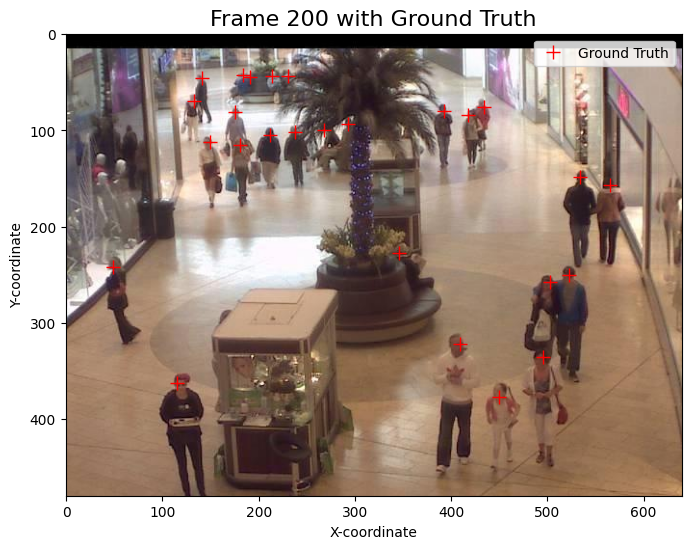

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the images and ground truth files
images_path = '/content/images.npy'  # Path to the images.npy file
images_gt_path = '/content/images_gt.npy'  # Path to the images_gt.npy file

images = np.load(images_path)  # Load the images
images_gt = np.load(images_gt_path, allow_pickle=True)  # Load the ground truth

# Choose a specific frame to visualize (e.g., frame 200)
frame_id = 200

# Plot the image with ground truth annotations
plt.figure(figsize=(8, 6))
plt.imshow(images[frame_id])  # Display the image
plt.plot(
    images_gt[frame_id][:, 0],  # X-coordinates of ground truth points
    images_gt[frame_id][:, 1],  # Y-coordinates of ground truth points
    'r+',  # Red cross marker
    markersize=10,  # Marker size
    label="Ground Truth"
)
plt.title(f"Frame {frame_id} with Ground Truth", fontsize=16)  # Add title
plt.xlabel("X-coordinate")  # Label the X-axis
plt.ylabel("Y-coordinate")  # Label the Y-axis
plt.legend(loc="upper right")  # Add legend
plt.show()

## Creating images_density.npy from perspective_roi.mat file.


In [ ]:
import numpy as np
from scipy.io import loadmat

# Load the perspective_roi.mat file
perspective_roi_path = '/content/mall_dataset/mall_dataset/perspective_roi.mat'
perspective_roi_data = loadmat(perspective_roi_path)

# Extract roi and pMapN
roi = perspective_roi_data['roi'][0, 0][0]  # Binary mask
pMapN = perspective_roi_data['pMapN']  # Perspective normalization map

# Process roi (convert to float64 and normalize)
roi = np.array(roi, dtype=np.float64)  # Ensure it's a NumPy array
if np.max(roi) > 1:
    roi /= np.max(roi)

# Mask pMapN using roi and normalize
pMapN_masked = pMapN * roi
pMapN_masked /= np.max(pMapN_masked)

# Output check
print(f"ROI shape: {roi.shape}")
print(f"pMapN_masked max: {np.max(pMapN_masked)}")
print(f"pMapN_masked min: {np.min(pMapN_masked)}")

ROI shape: (480, 640)
pMapN_masked max: 1.0
pMapN_masked min: 0.0


In [ ]:
import numpy as np
import cv2

# Load ground truth data and images
images_gt = np.load('/content/images_gt.npy', allow_pickle=True)
images = np.load('/content/images.npy')

# Create density maps
images_density = []
for frame_id, gt_points in enumerate(images_gt):
    # Initialize a density map with the same size as the image
    density_map = np.zeros((images[frame_id].shape[0], images[frame_id].shape[1]), dtype=np.float32)

    # Assign values from the ground truth
    for pt in gt_points:
        x, y = int(pt[0]), int(pt[1])
        if 0 <= x < density_map.shape[1] and 0 <= y < density_map.shape[0]:
            # Add Gaussian value to the density map
            temp_map = np.zeros_like(density_map, dtype=np.float32)
            temp_map[y, x] = 1
            density_map += cv2.GaussianBlur(temp_map, (15, 15), sigmaX=4)

    # Append the map to the list
    images_density.append(density_map)

# Convert to numpy array and save
images_density = np.array(images_density)
np.save('/content/images_density.npy', images_density)

print("The file 'images_density.npy' has been successfully created!")

The file 'images_density.npy' has been successfully created!


Number of people: 26.00


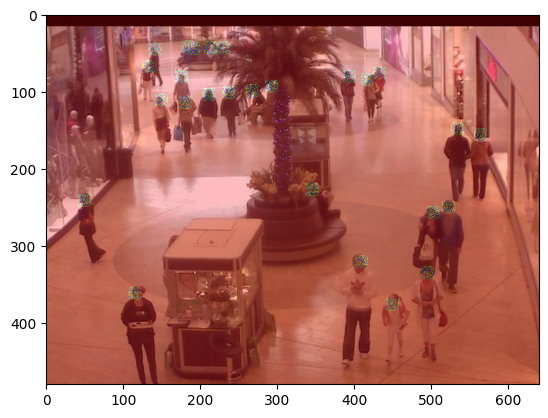

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load files
images = np.load('/content/images.npy')
images_density = np.load('/content/images_density.npy')

# Display a frame with the density map
frame_id = 200  # Frame 200
plt.imshow(images[frame_id])
plt.imshow(images_density[frame_id], cmap='prism', interpolation='bicubic', alpha=0.25)
print(f"Number of people: {np.sum(images_density[frame_id]):.2f}")
plt.show()

## Creating labels.npy from images_gt.npy


In [ ]:
# Load ground truth
images_gt = np.load('/content/images_gt.npy', allow_pickle=True)

# Create labels from the number of people in each frame
labels = np.array([len(frame) for frame in images_gt])

# Save labels to a file named labels.npy
np.save('/content/labels.npy', labels)

print(f"The file 'labels.npy' has been successfully created with the number of people from the ground truth!")

The file 'labels.npy' has been successfully created with the number of people from the ground truth!


In [ ]:
print(len(labels), len(images_gt), len(images))

2000 2000 2000


In [ ]:
gt_counts = [len(frame) for frame in images_gt]
print("Labels (sample):", labels[:10])
print("Ground truth counts (sample):", gt_counts[:10])

Labels (sample): [29 30 35 31 26 26 28 27 29 31]
Ground truth counts (sample): [29, 30, 35, 31, 26, 26, 28, 27, 29, 31]


In [16]:
# Define the save path in Google Drive
save_path = '/content/drive/MyDrive/mall dataset/'

In [18]:
import os
import shutil

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the files
shutil.copy('/content/images.npy', os.path.join(save_path, 'images.npy'))
shutil.copy('/content/images_gt.npy', os.path.join(save_path, 'images_gt.npy'))
shutil.copy('/content/images_density.npy', os.path.join(save_path, 'images_density.npy'))
shutil.copy('/content/labels.npy', os.path.join(save_path, 'labels.npy'))

print("Files have been successfully saved to '/content/drive/MyDrive/mall dataset'!")

Files have been successfully saved to '/content/drive/MyDrive/mall dataset'!
